# BibRec: Training Random Forest Model

### Prediction: For given Country & Age
Input for the model is a list of top rated books along with the user information

In [7]:
from bibrec.server.Utils import *

# Load the model from the file
MODEL_FILE_PKL = "data/rf-model.pkl"

# input user
user = pd.DataFrame([{
    'userId': None,
    'age': 20,
    'city': None,
    'state': None,
    'country': "usa"
}])
user

,userId,age,city,state,country
0,None,20,None,None,usa


In [8]:
books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:393: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_path, sep=",", encoding="utf-8", na_filter=False)


In [9]:
df_user = user
df_user
df_user = normalize_country(df_user)
df_user = normalize_state(df_user)
df_user = hot_encode_users(df_user)
df_user = df_user.filter(regex="age|country_|state_", axis=1)
df_user

0    usa
Name: country, dtype: object
['usa']
['usa', 'other', 'canada', 'united_kingdom', 'germany', 'spain', 'australia', 'italy', 'france', 'portugal', 'new_zealand', 'netherlands', 'switzerland', 'brazil', 'china', 'sweden', 'india', 'austria', 'malaysia', 'argentina', 'singapore']


,age,country_usa,country_other,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,...,state_british_columbia,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_
0,20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# predict based on all available books
encoded_books = get_encoded_books("data/encoded_books.csv")
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
# add user features to encoded books
df_input = df_books.assign(**df_user.iloc[0])
df_input

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,state_british_columbia,state_ohio,state_michigan,state_oregon,state_virginia,state_massachusetts,state_missouri,state_nordrhein-westfalen,state_north_carolina,state_
0,9780195153446,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9780002005012,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780060973124,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780374157067,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780393045215,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270940,978052544763,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270941,9780060086671,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270942,9780192126047,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# if exists(MODEL_FILE_PKL):
#     print("get model")
#     rfc = get_model(MODEL_FILE_PKL)
# else:
print("train model with pre-encoded files")
encoded_books = get_encoded_books()
encoded_users = get_encoded_users()
rfc = train_model_rf_encoded(encoded_books, encoded_users, ratings)

train model with pre-encoded files


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.8s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.2s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.2s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    5.3s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    7.1s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    9.4s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   11.5s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   14.1s


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   17.2s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   20.3s


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   23.6s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   25.5s finished


In [12]:
rfc_predict = rfc.predict(df_input)
pd.DataFrame(rfc_predict)

/home/fab/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    1.5s
[Parallel(n_j

,0
0,8
1,7
2,8
3,8
4,9
...,...
270939,5
270940,5
270941,7
270942,8


<AxesSubplot: ylabel='count'>

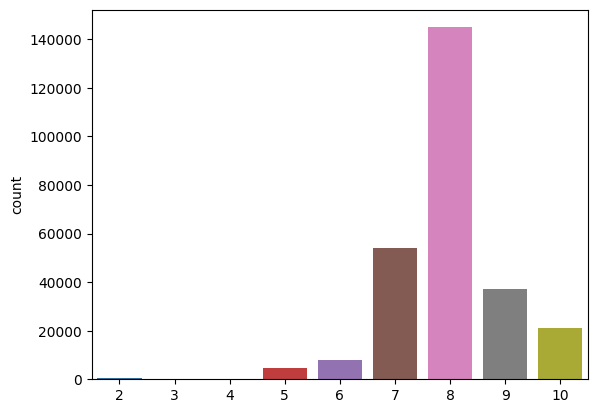

In [13]:
import seaborn as sns
sns.countplot(x = rfc_predict)

In [14]:
predictions = df_books.filter(regex="isbn13", axis=1)
predictions = predictions.reset_index()
predicted_ratings = pd.DataFrame(rfc_predict, columns=["predicted_book_rating"])
predictions = predictions.join(predicted_ratings)
predictions

,index,isbn13,predicted_book_rating
0,0,9780195153446,8
1,1,9780002005012,7
2,2,9780060973124,8
3,3,9780374157067,8
4,4,9780393045215,9
...,...,...,...
270939,270939,978044040095,5
270940,270940,978052544763,5
270941,270941,9780060086671,7
270942,270942,9780192126047,8


In [15]:
predictions = predictions.sort_values("predicted_book_rating", na_position="first", ascending=False)
predictions

,index,isbn13,predicted_book_rating
22853,22853,9781591132202,10
252436,252436,9780888391001,10
35966,35966,978067069503,10
64192,64192,9780972589505,10
98628,98628,9780005991343,10
...,...,...,...
269614,269614,9780373289462,2
32343,32343,9780373118403,2
1245,1245,9780373257072,2
46281,46281,9780373166053,2


In [16]:
print("Prediciton for:")
print(user)
predictions.merge(books, on="isbn13", how="left")

Prediciton for:
  userId  age  city state country
0   None   20  None  None     usa


,index,isbn13,predicted_book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,rating_mean,rating_count,normalized_year_of_publication
0,22853,9781591132202,10,Chance Place,Frankie Schelly,2002,other,http://images.amazon.com/images/P/1591132207.0...,http://images.amazon.com/images/P/1591132207.0...,http://images.amazon.com/images/P/1591132207.0...,5.000000,4.0,3
1,252436,9780888391001,10,Ralph Edwards of Lonesome Lake,John Edwards,1981,other,http://images.amazon.com/images/P/0888391005.0...,http://images.amazon.com/images/P/0888391005.0...,http://images.amazon.com/images/P/0888391005.0...,8.000000,1.0,24
2,35966,978067069503,10,"Teenage Romance, Or, How to Die of Embarrassment",Delia Ephron,1981,penguin_usa,http://images.amazon.com/images/P/0670695033.0...,http://images.amazon.com/images/P/0670695033.0...,http://images.amazon.com/images/P/0670695033.0...,2.333333,3.0,24
3,64192,9780972589505,10,Godschild Covenant: Return of Nibiru,Marshall Masters,2003,other,http://images.amazon.com/images/P/0972589503.0...,http://images.amazon.com/images/P/0972589503.0...,http://images.amazon.com/images/P/0972589503.0...,10.000000,1.0,2
4,98628,9780005991343,10,Collins Bible Handbook,Jacques Musset,1989,harpercollins,http://images.amazon.com/images/P/000599134X.0...,http://images.amazon.com/images/P/000599134X.0...,http://images.amazon.com/images/P/000599134X.0...,10.000000,1.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270941,269614,9780373289462,2,"Devil'S Kiss (Harlequin Historical, No 346)",Prue Scott,1996,harlequin,http://images.amazon.com/images/P/0373289464.0...,http://images.amazon.com/images/P/0373289464.0...,http://images.amazon.com/images/P/0373289464.0...,0.000000,1.0,9
270942,32343,9780373118403,2,Dark Fever (Top Author/Sins) (Harlequin Presen...,Arnette Lamb,1996,harlequin,http://images.amazon.com/images/P/0373118406.0...,http://images.amazon.com/images/P/0373118406.0...,http://images.amazon.com/images/P/0373118406.0...,1.500000,4.0,9
270943,1245,9780373257072,2,"Between The Sheets (Harlequin Temptation, No 607)",Mallory Rush,1996,harlequin,http://images.amazon.com/images/P/0373257074.0...,http://images.amazon.com/images/P/0373257074.0...,http://images.amazon.com/images/P/0373257074.0...,1.000000,5.0,9
270944,46281,9780373166053,2,Cowboy Hires A Wife (1-800-Husband) (Harlequin...,Jenna McKnight,1995,harlequin,http://images.amazon.com/images/P/0373166052.0...,http://images.amazon.com/images/P/0373166052.0...,http://images.amazon.com/images/P/0373166052.0...,1.666667,3.0,10
